## 📘 Summary: Gradient Descent for Linear Regression

This notebook implements **gradient descent** to optimize the parameters (`theta`) of a **linear regression** model by minimizing a cost function.

---

### 🔢 Objective

We aim to find the best-fitting line (or hyperplane) by minimizing the **cost function**, which measures how far the model's predictions are from the actual target values.

---

### 💡 Cost Function

The cost function used is **Mean Squared Error (MSE)**:




This function:
- Computes the model's predictions.
- Calculates the squared differences from the actual values.
- Averages them to get the cost (error).
- The `1/2` factor simplifies gradient calculations.

---

### 📥 Key Variables

- `X`: Input features (shape: m × n)
- `X_bias`: `X` with a column of ones for the intercept term (`theta_0`)
- `Y`: Target/output values (shape: m × 1)
- `theta`: Model parameters (shape: (n+1) × 1)
- `alpha`: Learning rate — controls how big each update step is
- `iterations`: Number of steps (updates) for gradient descent
- `cost_history`: List that tracks the cost at each iteration

---

### 🚀 Gradient Descent

At each iteration, the algorithm:
1. Computes predictions using current `theta`
2. Calculates the error
3. Computes the gradient (direction to move)
4. Updates `theta` to reduce the cost
5. Stores the cost for visualization/convergence check

The process repeats for the specified number of iterations.

---


In [177]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
# Config
DISP_WIDTH = 30

In [179]:
# Data: Study hours and corresponding exam scores
# Print the optimal parameters
print("*" * DISP_WIDTH )
print("LOADING DATASET ...".center(DISP_WIDTH))
print("*" *DISP_WIDTH)

******************************
     LOADING DATASET ...      
******************************


In [180]:
X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array([50,55,60,65,70,75,80,85,90,95])

In [181]:
X_bias = np.c_[np.ones(m), X]

In [182]:
theta = np.zeros(2)

In [183]:
alpha = 0.01
iterations = 100

In [184]:
# Cost function (Mean Squared Error)
def compute_cost(X_bias, Y, theta):
    m = len(Y)
    predictions = X_bias.dot(theta)
    errors = predictions - Y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

In [185]:
# Gradient descent algorithm
def gradient_descent(X_bias, Y, theta, alpha, iterations):
    m = len(Y)
    cost_history = []
    theta_history = [theta.copy()]

    for i in range(iterations):
        predictions = X_bias.dot(theta)
        errors = predictions - Y
        gradient = (1 / m) * X_bias.T.dot(errors)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X_bias, Y, theta))
        theta_history.append(theta.copy())
        
    return theta, cost_history, theta_history
    

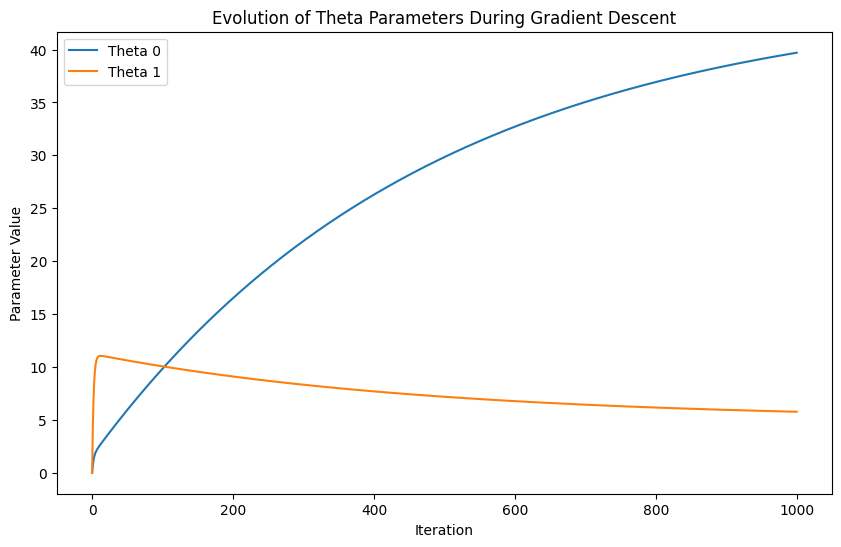

In [186]:
# Run gradient descent and get histories
theta, cost_history, theta_history = gradient_descent(X_bias, Y, theta, alpha=0.01, iterations=1000)

# Convert list of thetas to a NumPy array for easier plotting
theta_array = np.array(theta_history)  # shape: (iterations+1, number_of_parameters)

plt.figure(figsize=(10, 6))
for i in range(theta_array.shape[1]):
    plt.plot(theta_array[:, i], label=f'Theta {i}')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Evolution of Theta Parameters During Gradient Descent')
plt.legend()
plt.show()


In [187]:
theta_optimal, cost_history, theta_history = gradient_descent(X_bias, Y, theta, alpha, iterations)

In [188]:
print("*" * DISP_WIDTH )
print(f"Optimal Theta: {theta_optimal}".center(DISP_WIDTH))
print("*" *DISP_WIDTH)

******************************
Optimal Theta: [40.70274686  5.61725981]
******************************


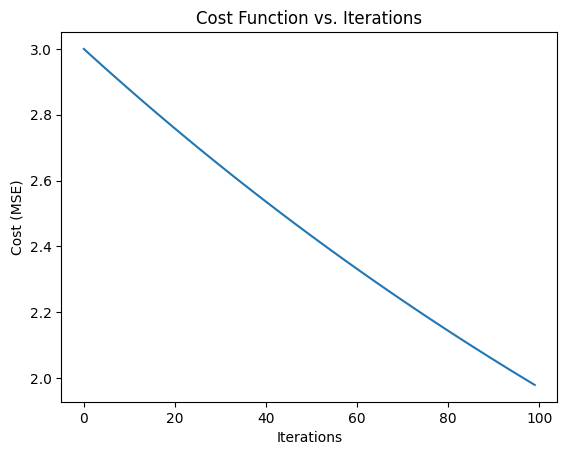

In [189]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function vs. Iterations')
plt.show()

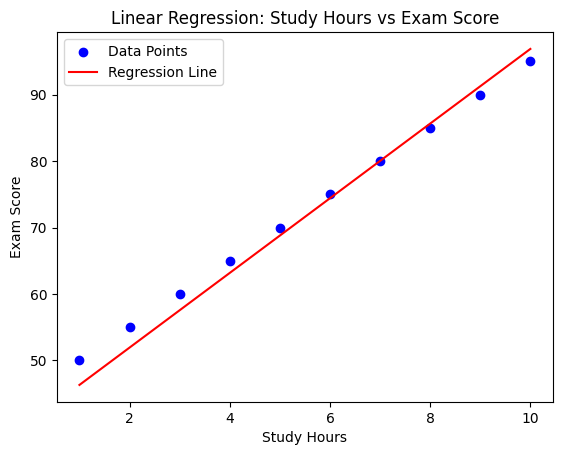

In [190]:
# Plotting the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, X_bias.dot(theta_optimal), color='red', label='Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Study Hours vs Exam Score')
plt.legend()
plt.show()